## Linear classification

In [123]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
# get only the first 2 attributes
X,y=iris.data[:,:2],iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

print (X_train[0],y_train[0],"\n",X_train.shape, y_train.shape)

iris.feature_names

[5.  2.3] 1 
 (112, 2) (112,)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [124]:
X_train

array([[5. , 2.3],
       [4.9, 3.1],
       [6.3, 2.3],
       [5.8, 2.6],
       [6.2, 2.9],
       [4.7, 3.2],
       [4.6, 3.4],
       [5.1, 2.5],
       [4.8, 3.4],
       [7.9, 3.8],
       [5.1, 3.4],
       [5.1, 3.7],
       [5.6, 2.9],
       [6.5, 3. ],
       [5.4, 3.9],
       [7. , 3.2],
       [5.8, 2.8],
       [7.7, 2.6],
       [5.5, 2.5],
       [5.9, 3.2],
       [4.9, 3.6],
       [4.5, 2.3],
       [6.3, 2.8],
       [4.4, 2.9],
       [5. , 3.6],
       [7.2, 3. ],
       [6. , 3.4],
       [6.2, 2.2],
       [7.4, 2.8],
       [6.8, 3. ],
       [6.4, 2.8],
       [5.7, 2.5],
       [5. , 3.5],
       [5.1, 3.8],
       [6.8, 2.8],
       [5.2, 2.7],
       [5.1, 3.8],
       [5.6, 2.5],
       [6.1, 3. ],
       [6.6, 2.9],
       [6.4, 2.8],
       [4.3, 3. ],
       [7.2, 3.6],
       [5.1, 3.5],
       [6.3, 2.5],
       [4.4, 3.2],
       [7.6, 3. ],
       [6.4, 3.2],
       [5.1, 3.8],
       [6.5, 3.2],
       [6.3, 2.7],
       [5. , 3.5],
       [5.2,

## Standardization
#### Standardize the features. Does not change the distribution, bt avoid features with extreme values, which may weight too much on the fial resluts

In [125]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standardized=scaler.transform(X_train)
X_test_standardized=scaler.transform(X_test)

for _ in range (10):
    print(X_train[_])

[5.  2.3]
[4.9 3.1]
[6.3 2.3]
[5.8 2.6]
[6.2 2.9]
[4.7 3.2]
[4.6 3.4]
[5.1 2.5]
[4.8 3.4]
[7.9 3.8]


### Visualize the data

Text(0, 0.5, 'Sepal width [standardized]')

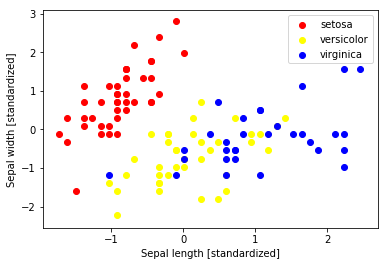

In [128]:
import matplotlib.pyplot as plt
colors=['red','yellow','blue']
for species in range(len(colors)):
    sepal_length=X_train_standardized[:,0][y_train==species]
    sepal_width=X_train_standardized[:,1][y_train==species]
    plt.scatter(sepal_length,sepal_width,c=colors[species])

plt.legend(iris.target_names)
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Sepal width [standardized]')

## Stochastic gradient descent 
#### To find a boundary line/ hyperplane by minimizing the loss function. 
#### Evey futrueclassification decision depends on one hyperplane.

In [112]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier()
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

#### If print out the coefficient, it will have 3 values rather than one. Because the classifier converts the 3-class binary problem into 3 binary problems - separate each class from the rest 2 classes. 
#### It should also have 3 intercept values for the 3 solutions.

In [113]:
print(clf.coef_)
print (clf.intercept_)

[[-26.32632003  19.14834712]
 [  5.96268522  -9.44170072]
 [ 11.68579828  -1.08386871]]
[-17.41255763  -2.55766092 -16.83698183]


### Visualize

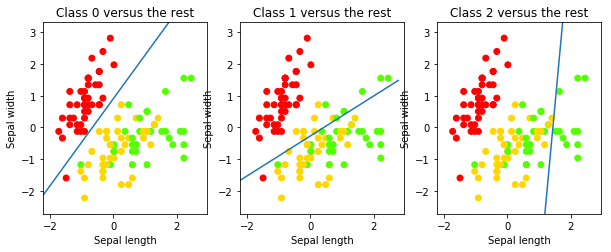

In [114]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() +.5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() +.5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

### Predict using this classifier

Text(0, 0.5, 'Sepal width [cm]')

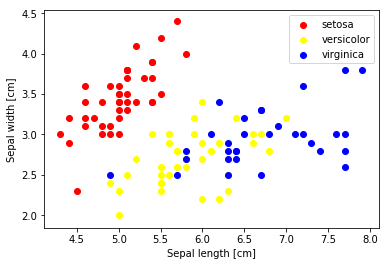

In [138]:
for species in range(len(colors)):
    sepal_length=X_train[:,0][y_train==species]
    sepal_width=X_train[:,1][y_train==species]
    plt.scatter(sepal_length,sepal_width,c=colors[species])

plt.legend(iris.target_names)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Sepal width [cm]')

In [140]:
#point(8,4) should be blue
this_should_be_blue = [[8,4]]
predicted_class=clf.predict(scaler.transform(this_should_be_blue))
color=colors[predicted_class[0]]
print(color)

#point(5,4.5) should be red
this_should_be_blue = [[5,4.5]]
predicted_class=clf.predict(scaler.transform(this_should_be_blue))
color=colors[predicted_class[0]]
print(color)

blue
red
